# _____________🍊🍌🍏 Fruit Calssification 🍏🍌🍊______________________ # 

# 

#     IMPORTING THE LIBRARY

In [6]:
import tensorflow as tf 
import keras
import cv2 
import os
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import image
from os import listdir
from os.path import isfile, join
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# 

# READING THE DATASET

In [7]:
train_data_dir = "train"
test_data_dir = "test"

print("Training image:")
train_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(train_data_dir,target_size=(100, 100),
                                              batch_size =32,class_mode='categorical',shuffle=True)

print("Testing image:")
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_data_dir,target_size=(100, 100),
                                            batch_size=32,class_mode='categorical',shuffle=False)

Training image:
Found 41322 images belonging to 81 classes.
Testing image:
Found 13876 images belonging to 81 classes.


# 

# Load our Training Module

In [8]:
model=tf.keras.models.load_model("TRINED_MODEL.model")

# 

# Testing our Model

In [9]:
def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + "/" + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return keras.preprocessing.image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

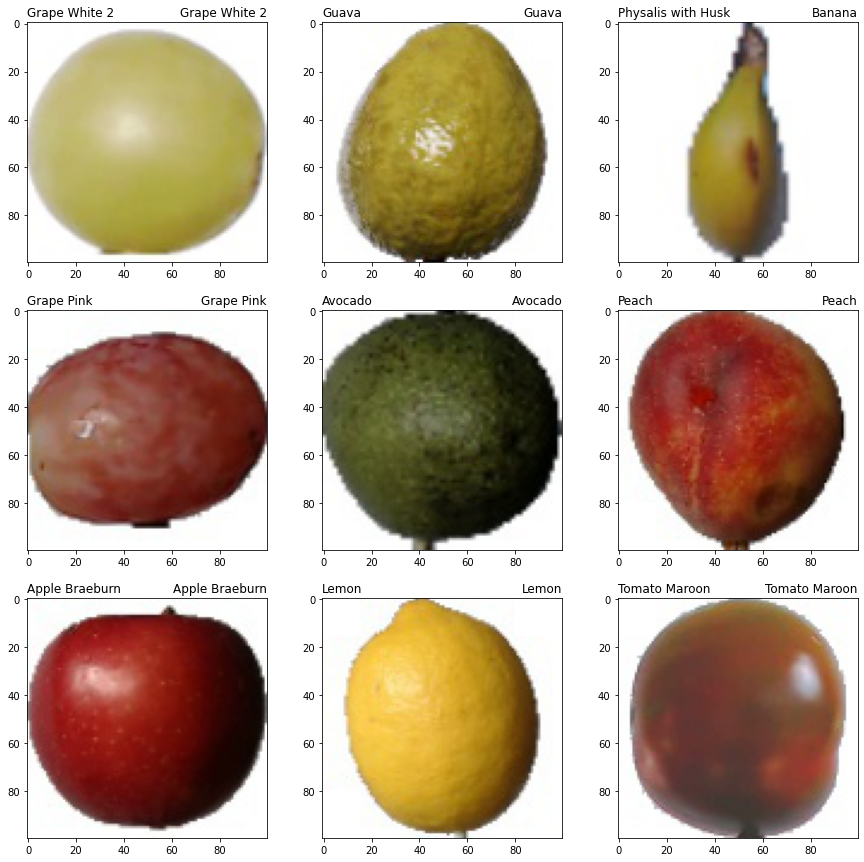

In [10]:
img_width, img_height = 100,100
class_labels = test_set.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 9):
    path = 'test' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 1)
    predictions.append(classes)

c=1
plt.figure(figsize=(15,15))
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    plt.subplot(3,3,c)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title( class_labels[predictions[i][0]],loc='left')
    plt.title( true_labels[i],loc='right')
    c+=1    
cv2.destroyAllWindows()

# 

# 